# Jacob Prebys Viz Exploratory

Doing some more exploratory vizualizations in this one

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from bokeh.plotting import figure, output_file, show
pd.set_option('display.max_columns', 500)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 24,
         'axes.titlesize':24,
         'xtick.labelsize':20,
         'ytick.labelsize':24}
plt.rcParams.update(params)

Reading in our data in the same way as my previous notebook

In [2]:
X_raw = pd.read_csv('../data/train_data.csv', dtype={'id': object})
y_raw = pd.read_csv('../data/train_targets.csv', dtype={'id': object})

# Join the two tables using their 'id' column
df = y_raw.set_index('id').join(X_raw.set_index('id'))

Going to do some research into the effect that a water point's region has on its functionality

In [3]:
region_status = pd.DataFrame(df.groupby('region')['status_group'].value_counts())
region_status

status_group
region        status_group                         
Arusha        functional                       2294
              non functional                    881
              functional needs repair           175
Dar es Salaam functional                        461
              non functional                    341
...                                             ...
Tabora        functional                        848
              functional needs repair            45
Tanga         functional                       1436
              non functional                   1038
              functional needs repair            73

[63 rows x 1 columns]

I think this would be more useful as an unstacked DataFrame

In [4]:
reg = df.groupby('region')['status_group'].value_counts().unstack()
reg

status_group,functional,functional needs repair,non functional
region,,,
Arusha,2294,175,881
Dar es Salaam,461,3,341
Dodoma,1009,209,983
Iringa,4141,123,1030
Kagera,1727,304,1285
Kigoma,1363,603,850
Kilimanjaro,2640,322,1417
Lindi,460,93,993
Manyara,987,96,500


Making some new columns...i know this is not the most efficient way to do this

In [5]:
reg['pfunc'] = reg['functional'] / (reg['functional']
                                    + reg['functional needs repair']
                                    + reg['non functional'])
reg['prep'] = reg['functional needs repair'] / (reg['functional']
                                    + reg['functional needs repair']
                                    + reg['non functional'])
reg['pnon'] = reg['non functional'] / (reg['functional']
                                    + reg['functional needs repair']
                                    + reg['non functional'])

Going to get just the 2 regions with the highest proportion of functional water points, and then the 2 regions with the lowest

In [6]:
ratios = reg.drop(['functional', 'functional needs repair', 'non functional'], axis=1)
rename = {'pfunc':'functional','prep':'functional needs repair' , 'pnon':'non functional'}
ratios.rename(columns=rename, inplace=True)

In [7]:
sortedx = ratios.sort_values('functional')
extreme = pd.concat([sortedx.head(2), sortedx.tail(2)])

Now I'll plot these 4 regions as a segmented bar plot

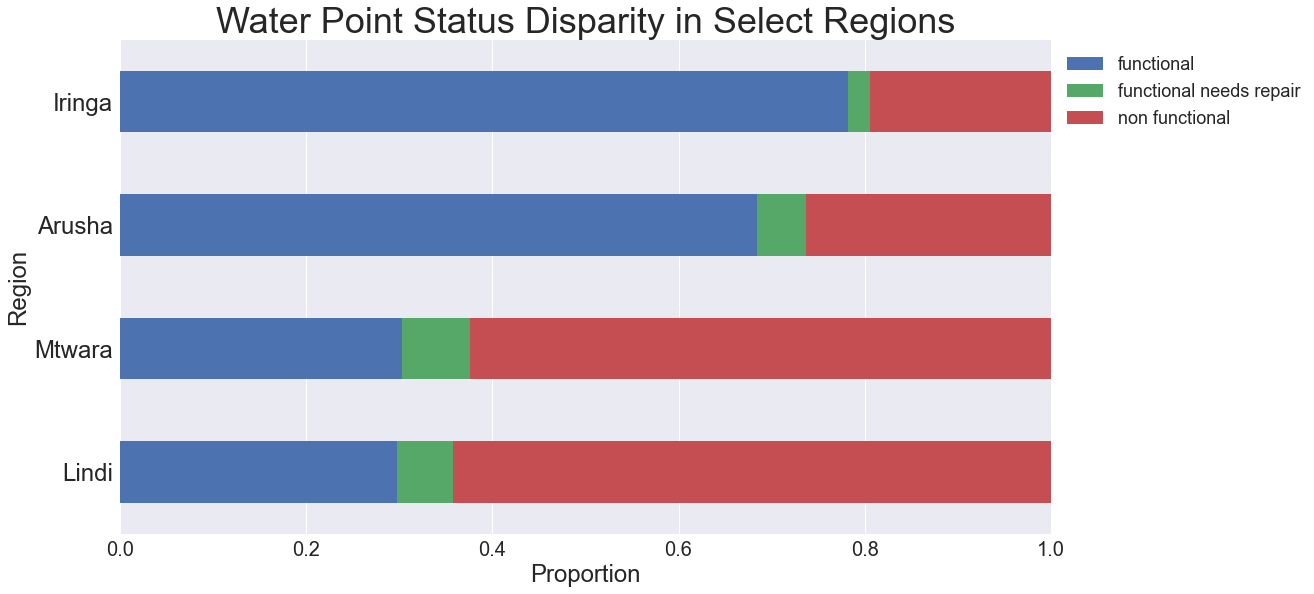

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Water Point Status Disparity in Select Regions',
             fontdict={'fontsize':36})

ax.set_xlabel('Proportion')
ax.set_xlim(0,1)
extreme.plot.barh(stacked=True, ax=ax);
ax.set_ylabel('Region',)
ax.legend(fontsize=18, bbox_to_anchor=(1,1));
plt.tight_layout(pad=7)
plt.savefig('../reports/figures/region_disparity.png', tranparent=True)

*That's a nice plot*